# 1.1 Введение в scipy и моделирование распределения с произвольной плотностью

## Библиотека `scipy` (модуль `scipy.stats`)

В этом занятии рассмотрим только модуль `scipy.stats`.
Почитайте <a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/stats.html">его описание</a>. И обратите внимание на документацию по работе со следующими распределениями:

- непрерывными (**Continuous**),
- дискретными (**Discrete**),
- многомерными (**Multivariate**). 

Пакет также предоставляет некоторое количество статистических методов, которые рассматриваются в курсах статистики.

In [1]:
# импортируем необходимые библиотеки

import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

Замечание: если нет какого-то пакета, то его можно установить прямо здесь, в ноутбуке. Нужно просто в ячейку ввести команду: 
        
```python
!pip install scipy
```

или 

```python
!pip install numpy
```

и т.д.

## 1. PMF, PDF, CDF

Перед тем как переходить к библиотеке, рассмотрим несколько понятий. На русском языке они уже вам **знакомы из базового курса**. Но для использования библиотеки scipy необходимо понимать их на английском.

- **PMF (probability mass function)** — функция вероятности, простой способ определения вероятностей каждого дискретного результата.
- **PDF (probability density function)** — функция плотности вероятности для непрерывных случайных величин.
- **CDF (cumulative distribution function)** — функция распределения.

Ещё раз отметим: 

- **PMF** — способ задания дискретных случайных величин.
- **PDF** — способ задания непрерывных случайных величин.
- **CDF** — данным способом могут быть заданы как дискретные, так и непрерывные случайные величины.

### 1.1 PMF and CDF 

Очень просто проследить разницу для дискретных случайных величин.
Представьте, что вы бросаете идеальный кубик. Вероятность выпадения каждой грани 1/6.  

![image-3.png](attachment:image-3.png)

На графике PMF указаны просто вероятности каждого исхода. А вот на графике CDF — кумулятивная сумма. То есть:

$P(X\leq 4) = P(X=1) + P(X=2) + P(X=3) + P(X=4)$

### 1.2 PDF and CDF

Примерно то же самое происходит и для непрерывной случайной величины.

![image.png](attachment:image.png)

Просто важно помнить, что для непрерывной случайной величины существует сколь угодно много значений. Поэтому по PDF нельзя вычислить вероятность конкретного значения, как по PMF, а вот вероятность интервала — можно. 

### 1.3 PPF — Percent Point Function

Есть ещё одно понятие, которое может вводить в заблуждение — PPF. Да, сокращений много, но нужно в них разбираться. 
Данный метод, как и все предыдущие, также реализован в scipy. Здесь всё просто: по заданному CDF возвращается значение случайной величины. По сути, это просто тот же график CDF, но с обратными осями. 

![image.png](attachment:image.png)

## 2. Работа с библиотекой `scipy.stats`.

<b>Общий принцип</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`.
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction).
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$.
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction).
* `X(params).mean()` — математическое ожидание.
* `X(params).median()` — медиана ($1/2$-квантиль).
* `X(params).var()` — дисперсия (<b>Var</b>iance).
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того, для непрерывных распределений определены функции:
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction).
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных:
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction).
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

## 3. Пример дискретного распределения

Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [4]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [7 5 8 4 7 9 4 5 6 8]
Выборочное среднее: 5.845
Выборочная дисперсия: 2.551


In [7]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 0.00000000e+00
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [8]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [3. 4. 6. 8. 8.]


## 4. Пример непрерывного распределения

Для примера сгенерируем выборку размера $N = 200$ из нормального распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределённых случайных величин. Часто в разговорной речи выборку отождествляют с её *реализацией* — значениями случайных величин из выборки при «выпавшем» элементарном исходе.

In [9]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])

Первые 10 значений выборки:
 [ 2.75801513  0.20569544 -6.50019909 -0.0301521   3.20497418  0.25720968
  1.71726443  5.00807552  3.54055539 -1.5009186 ]


In [10]:
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 1.272
Выборочная дисперсия: 8.996


Вероятностные характеристики:

In [11]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]





$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [12]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


## 5. Пример многомерного распределения

Отдельно есть класс для <b>многомерного нормального распределения</b>.
Для примера сгенерируем выборку размера $N=200$ из распределения $\mathcal{N} \left( \begin{pmatrix} 1 \\ 1 \end{pmatrix},  \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \right)$.

In [13]:
sample = sps.multivariate_normal(
    mean=[1, 1], cov=[[2, 1], [1, 2]]
).rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее:', sample.mean(axis=0))
print('Выборочная матрица ковариаций:\n', np.cov(sample.T))

Первые 10 значений выборки:
 [[ 1.14528347 -1.64514324]
 [ 1.20433499  1.41234827]
 [ 2.01666236  2.70549261]
 [ 0.49254473  1.52638402]
 [ 1.35928577  1.55214562]
 [-0.85417659  0.34442188]
 [ 0.3877141   2.76911719]
 [ 1.31590063  0.3500452 ]
 [ 1.92583852  2.18093625]
 [ 1.99821814  2.61106354]]
Выборочное среднее: [1.11862374 1.1780223 ]
Выборочная матрица ковариаций:
 [[1.85750112 1.00691983]
 [1.00691983 2.09261572]]


Некоторая хитрость :)

In [14]:
sample = sps.norm(loc=np.arange(10), scale=0.1).rvs(size=10)

print(sample)

[-0.02796856  1.03016517  1.89170445  3.09740071  4.1040646   5.1056742
  6.13839078  7.18232358  7.99393174  9.11571462]


## 6. Новое распределение

Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.

Для этого надо создать класс, который будет наследоваться:

- от класса `rv_continuous` для непрерывных случайных величин;
- класса `rv_discrete` для дискретных случайных величин.

<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации</a>.

### 6.1 О дискретном

Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [15]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])

Первые 10 значений выборки:
 [2 1 1 1 1 1 3 1 3 1]


In [16]:
print('Выборочное среднее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Выборочное среднее: 1.595
Частота значений по выборке: 0.645 0.115 0.24


### 6.2 О непрерывном

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [18]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return (4 * x ** 3) / 15
    
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])

Первые 10 значений выборки:
 [1.8427162  1.91905904 1.91027158 1.68825716 1.75826918 1.19010358
 1.7482936  1.85993008 1.10444095 1.43593555]


In [20]:
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 1.660
Выборочная дисперсия: 0.061


## 7. Метод обратного преобразования 

В теории моделирования генерация случайных величин становится одним из наиболее важных «строительных блоков», где эти случайные величины в основном генерируются из равномерно распределенной случайной величины. Одним из методов, которые можно использовать для генерации случайных величин, является метод обратного преобразования.

Дана случайная величина U, где U равномерно распределена в [0,1]. Предположим, что мы хотим сгенерировать случайную величину X, где функция распределения (CDF) равна:

$$F_X(x) = P(X\leq x)$$

Идея метода обратного преобразования состоит в том, чтобы сгенерировать случайное число из любого распределения вероятностей, используя его обратный CDF следующим образом:

$$F_X^{-1}(U) = X$$

Математически — найти обратную функцию (вместо x подставить y, а вместо y подставить x).

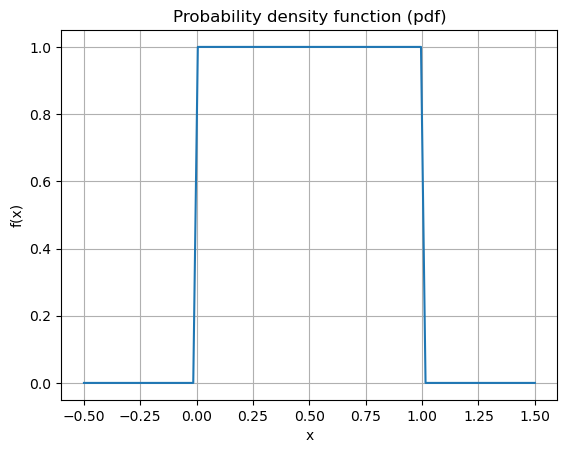

In [21]:
# Функция плотности вероятности нормального распределения

a, b = 0, 1
rv_uniform = sps.uniform(loc=a, scale=b-a)

X = np.linspace(-0.5, 1.5, 100)
plt.plot(X, rv_uniform.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.grid()
plt.show()

Давайте в качестве примера рассмотрим непрерывное экспоненциальное распределение.
    
Предположим, что мы хотим смоделировать случайную величину X, которая следует экспоненциальному распределению со средним значением λ (т. е. X~EXP(λ)). Функция распределения (CDF) у данной случайной величины: 

$$F(x)= 1 - e^{-\lambda x}$$

Обратная функция: 

$$F^{-1}(x) = -\frac{1}{\lambda}ln(1-x)$$

Таким образом, если ${\displaystyle U_{1},\ldots ,U_{n}}$ — выборка из стандартного непрерывного равномерного распределения, и

$${\displaystyle X_{i}=-{\frac {1}{\lambda }}\ln(1-U_{i}),\;i=1,\ldots ,n},$$то мы ожидаем, что ${\displaystyle X_{1},\ldots ,X_{n}}$ будут из экспоненциального распределения.

In [22]:
def exponential_inverse_trans(n=1, mean=1):
    '''
    Функция, демонстрирующая метод обратного преобразования для экспоненциальной случайной величины.
    n - размер генерируемой выборки.
    mean - среднее значение.
    '''
    #Генерируем выборку для нормального равномерного распределения
    U = sps.uniform.rvs(size=n)
    
    # Применяем формулу обратного cdf к U
    # обратите внимание на знак умножения. Подумайте, почему так задана формула.
    X = - np.log(1-U)*mean
    
    # Генерируем выборку из экспоненциального распределения для сравнения
    actual = sps.expon.rvs(size=n, scale=mean)
    
    plt.figure(figsize=(12,9))
    plt.hist(
        X, 
        bins=50, 
        alpha=0.5, 
        label="Сгенерированная с.в.")
    
    plt.hist(
        actual, 
        bins=50, 
        alpha=0.5, 
        label="Реальная с.в.")
    
    plt.title("Сгенерированная vs реальная %i Экспоненцальные с.в." %n)
    plt.grid()
    plt.legend()
    plt.show()
    return X

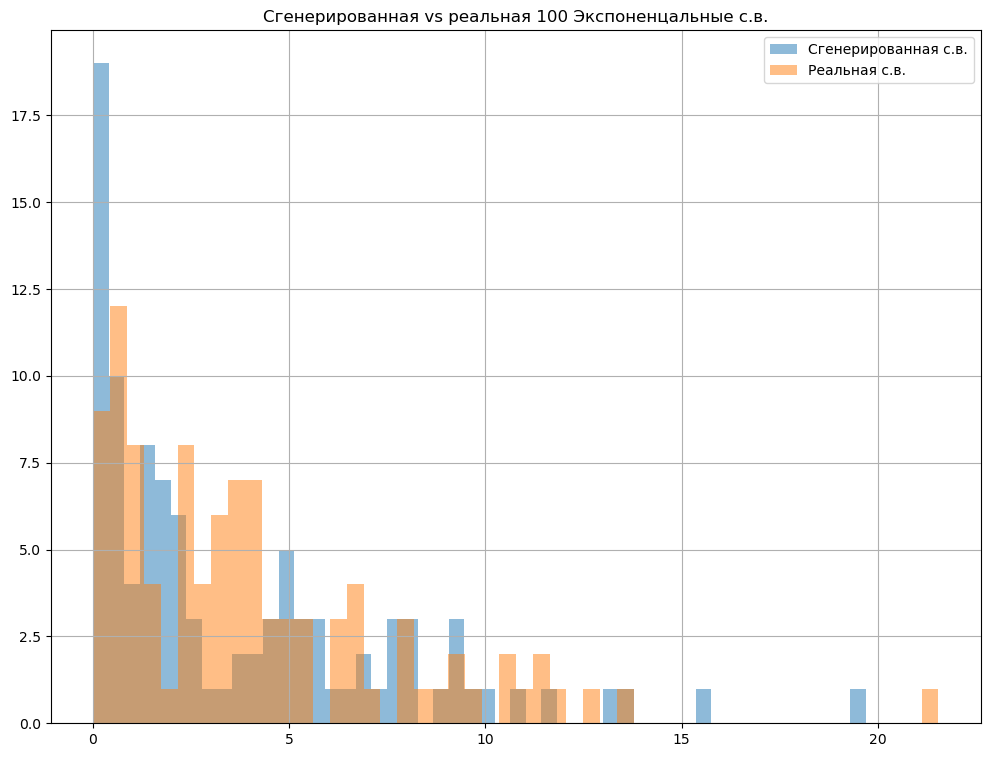

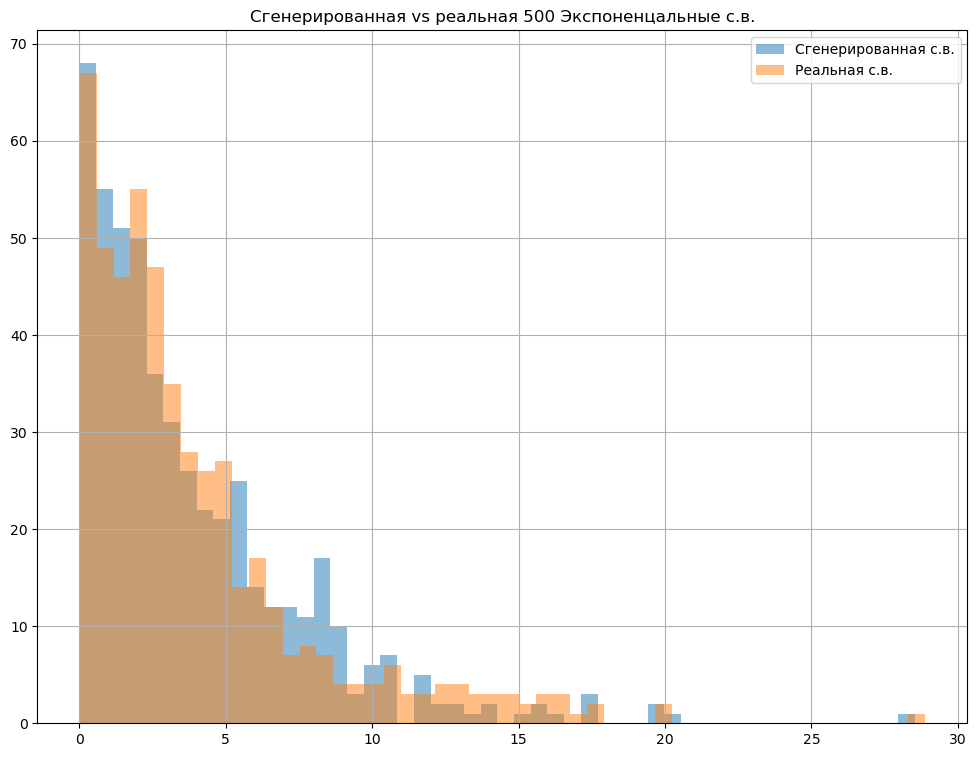

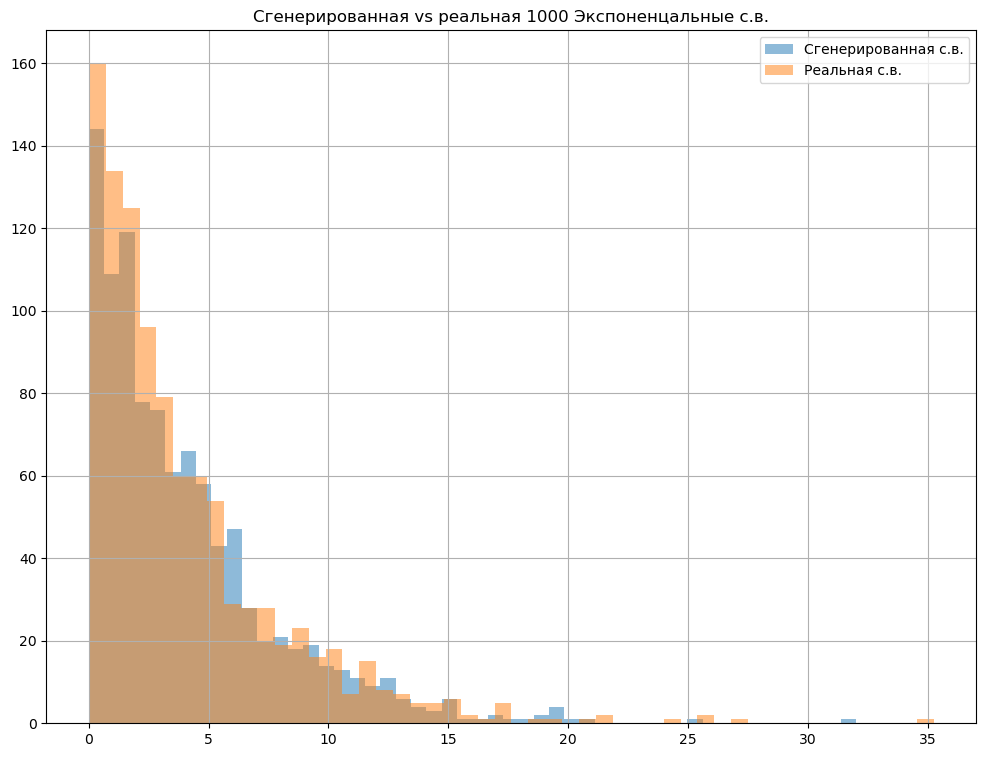

In [23]:
cont_example1=exponential_inverse_trans(n=100, mean=4)
cont_example2=exponential_inverse_trans(n=500, mean=4)
cont_example3=exponential_inverse_trans(n=1000, mean=4)

**Вывод:** графики показывают сравнение реальной показательной случайной величины и сгенерированной показательной случайной величины из равномерного распределения. Так как графики накладываются друг на друга и повторяют форму, то можно сделать вывод, что мы действительно получили требуемую случайную величину.